current plot is  Review
current plot is  Theory


c:\Users\renxinrui\Documents\Wmp\rxr\rxr_uncertainty_overall\Utils\fit.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rangeGap = np.array(rangeGap)


[ 1.08117254e+14 -5.96998751e-01  7.55085040e+03]
sum_error**2 57.60060089196762
popt: [ 1.08117254e+14 -5.96998751e-01  7.55085040e+03]
系数A: 108117254106133.44
系数n: -0.5969987506780963
系数EA: 7550.850402254459
系数协方差: [[ 3.79769596e-19 -7.90799168e-11 -5.05554212e-07]
 [-7.90799168e-11  2.02217304e-02  1.05272217e+02]
 [-5.05554212e-07  1.05272217e+02  6.73000325e+05]]
参数标准差: [6.16254489e-10 1.42203131e-01 8.20365970e+02]
RSE: 0.6147494324845361
RSE2: 0.6147494324845361
std: 1.1573888039790337
系数yvals: [ 1.62408117  4.28223678  5.86402796  6.90985441  7.65067123  8.20163808
  8.62655741  8.96360609  9.23701223  9.46288376  9.6523419   9.8133086
  9.95157738 10.07148147 10.17632535 10.26867213 10.3505397  10.42353789
 10.4889663  10.54788527 10.60116827 10.64954118 10.693612  ]


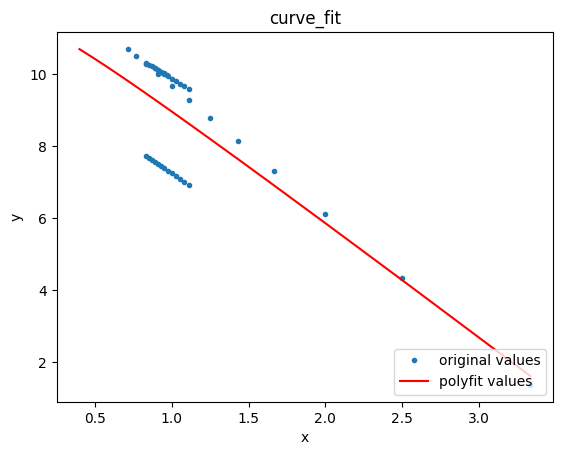

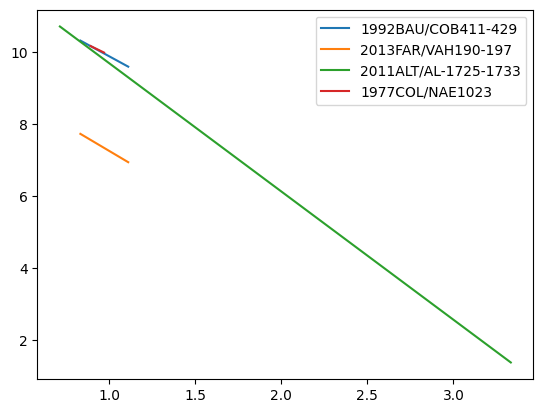

want to find  CH3CHO+HO2<=>CH3CO+H2O2
TT find it  CH3CHO+HO2<=>CH3CO+H2O2                                      +5.5600000E-003 +4.5000000E+000 +4.8290000E+003   !\2*A Mendes et al, J. Phys. Chem. A 118 (2014) 12089-12104.

CH3CHO HO2 CH3CO H2O2
hen find it  HO2+CH3CHO=H2O2+CH3CO                                   1.7000e+13    0.000     16293.00



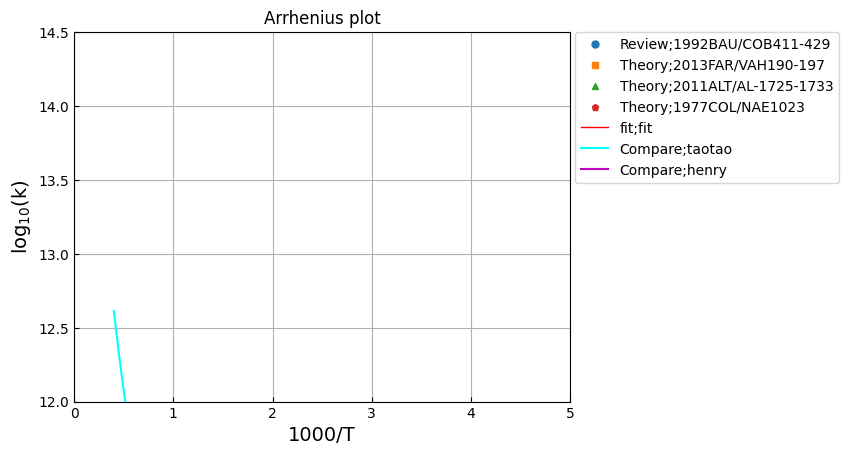

In [1]:
from Utils.DataConvert import ConvertData
from Utils.fit import Fit
from Utils.FindReaction import FindReaction
from Utils.Format import Format
from Utils.GetFileDir import GetFileDir
from Utils.GetReactionNum import GetReactionNum
from Utils.plot import Plot
import math

reactionnum = GetReactionNum()
excelname = GetFileDir(reactionnum,'forwardexcel')
outname = GetFileDir(reactionnum,'forwardtxt')

#转换web excel数据到txt文件
ConvertData(excelname, outname)
#拟合数据
A,n,EAR = Fit(outname,reactionnum)
K0 = 0
#把拟合的数据写入文件
fd = open(outname,'a+')
fitoneLine = Format('fit','fit',300,2500,A,n,EAR,K0)
fd.write(fitoneLine) 

#把TT和henrry数据写入文件,根据excel的名字来找到反应
ttdata,hendata = FindReaction(excelname,henryname='')
A = float(ttdata[0])
n = float(ttdata[1])
EA = float(ttdata[2])
EAR = EA/1.987
K0 = 0
ttoneLine = Format('Compare','taotao',300,2500,A,n,EAR,K0)
fd.write(ttoneLine) 

#有可能找不到henry的数据
if(len(hendata) != 0):
    A = float(hendata[0])
    n = float(hendata[1])
    EA = float(hendata[2])
    EAR = EA/1.987
    K0 = 0
    henoneLine = Format('0','henry',300,2500,A,n,EAR,K0)
    fd.write(henoneLine)
fd.close()

Plot(outname)